# Import Libraries

In [1128]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier 
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform
from sklearn.linear_model import Lasso, ElasticNet, Ridge, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR

In [1129]:
df_train = pd.read_csv('https://raw.githubusercontent.com/MikhaelAmos/House-Prices-Project/main/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1130]:
df_train.shape

(1460, 81)

In [1131]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1132]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1133]:
for col in df_train.columns:
  missing_values = df_train[col].isna().sum()
  print(f"{col} missing values: {missing_values}")

Id missing values: 0
MSSubClass missing values: 0
MSZoning missing values: 0
LotFrontage missing values: 259
LotArea missing values: 0
Street missing values: 0
Alley missing values: 1369
LotShape missing values: 0
LandContour missing values: 0
Utilities missing values: 0
LotConfig missing values: 0
LandSlope missing values: 0
Neighborhood missing values: 0
Condition1 missing values: 0
Condition2 missing values: 0
BldgType missing values: 0
HouseStyle missing values: 0
OverallQual missing values: 0
OverallCond missing values: 0
YearBuilt missing values: 0
YearRemodAdd missing values: 0
RoofStyle missing values: 0
RoofMatl missing values: 0
Exterior1st missing values: 0
Exterior2nd missing values: 0
MasVnrType missing values: 8
MasVnrArea missing values: 8
ExterQual missing values: 0
ExterCond missing values: 0
Foundation missing values: 0
BsmtQual missing values: 37
BsmtCond missing values: 37
BsmtExposure missing values: 38
BsmtFinType1 missing values: 37
BsmtFinSF1 missing values: 0
B

**Pembagian kolom kategorikal dan numerik**

In [1134]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical=["object"]
eda_num = df_train.select_dtypes(include=numerics)
eda_cat = df_train.select_dtypes(include=categorical) 

In [1135]:
eda_num.drop(['MSSubClass', 'OverallQual', 'OverallCond'], axis=1, inplace=True)

In [1136]:
add = {'MSSubClass': df_train['MSSubClass'], 
       'OverallQual': df_train['OverallQual'],
       'OverallCond': df_train['OverallCond'],}
for i in add:
  eda_cat[i] = add[i]

In [1137]:
eda_num.columns.value_counts().sum()

35

In [1138]:
eda_cat.columns.value_counts().sum()

46

In [1139]:
eda_cat.MSSubClass

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

# **Exploratory Data Analysis**

In [1140]:
grouped_df = df_train.groupby("OverallQual")[["SalePrice"]].mean()

<AxesSubplot:xlabel='OverallQual'>

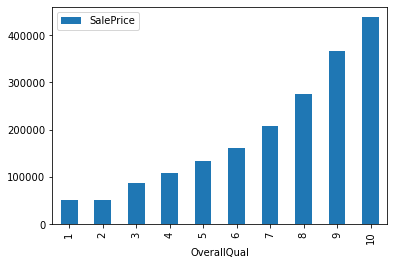

In [1141]:
grouped_df.plot(kind='bar')

In [1142]:
print(df_train.YearBuilt.max())
print(df_train.YearBuilt.min())

2010
1872


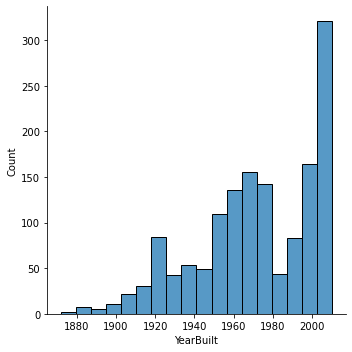

In [1143]:
#Rumah yang disale kebanyakan berada pada tahun 
sns.displot(data=df_train, x=df_train['YearBuilt'])
plt.show()

In [1144]:
df_train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

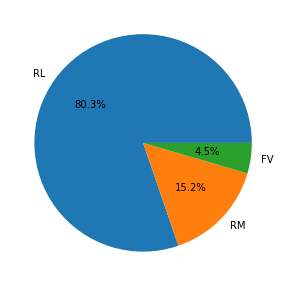

In [1145]:
RL = df_train.loc[df_train['MSZoning']== 'RL'].count()[0]
RM = df_train.loc[df_train['MSZoning']== 'RM'].count()[0]
FV = df_train.loc[df_train['MSZoning']== 'FV'].count()[0]

#Melalui pie chart ini kita mengetahui bahwa rumah di Ames, Iowa kebanyakan berada di Residential Low Density
plt.figure(figsize=(5,5))
plt.pie([RL, RM, FV], autopct='%1.1f%%', labels=['RL','RM', 'FV'])
plt.show()

In [1146]:
df_train.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

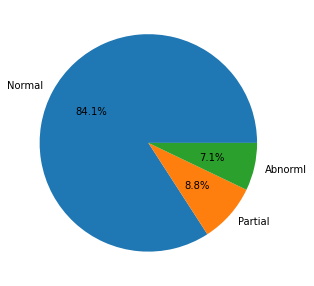

In [1147]:
Normal = df_train.loc[df_train['SaleCondition']== 'Normal'].count()[0]
Partial = df_train.loc[df_train['SaleCondition']== 'Partial'].count()[0]
Abnorml = df_train.loc[df_train['SaleCondition']== 'Abnorml'].count()[0]

plt.figure(figsize=(5,5))
plt.pie([Normal, Partial, Abnorml], autopct='%1.1f%%', labels=['Normal','Partial', 'Abnorml'])
plt.show()


# Bivariate Analysis

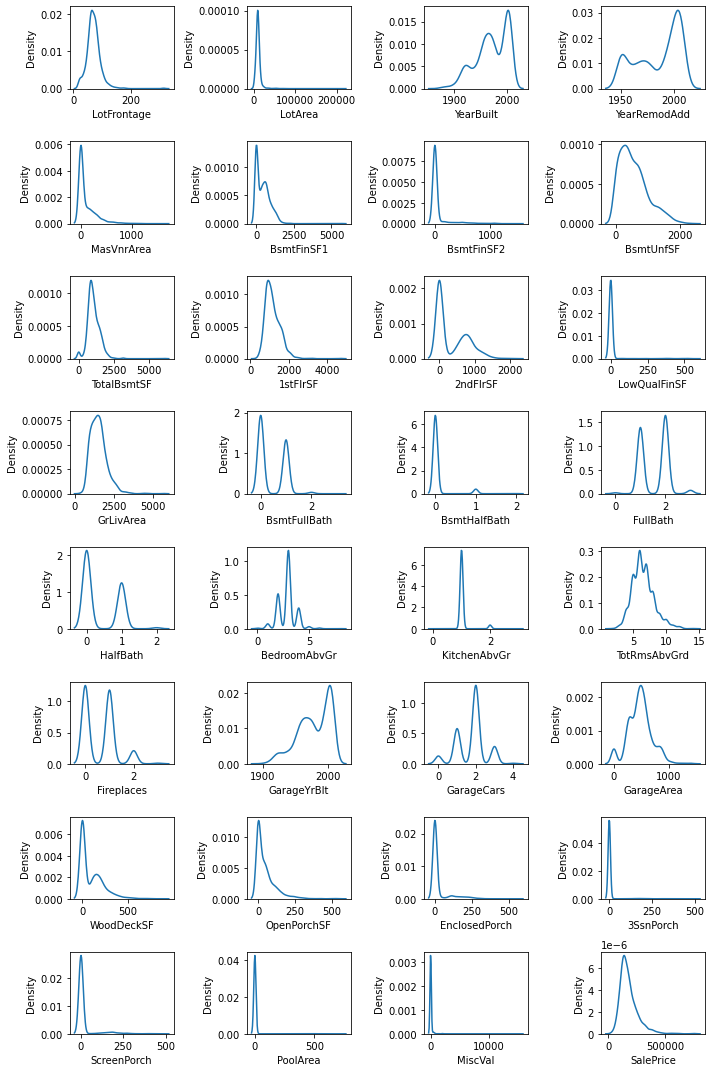

In [1148]:
data_coba=eda_num.copy()
data_coba.drop(columns=["YrSold","MoSold","Id"],inplace=True)
plt.figure(figsize =(10,15))
for i in enumerate(data_coba):
    plt.subplot(8,4,i[0]+1)
    sns.kdeplot(data_coba[i[1]])
    plt.tight_layout()

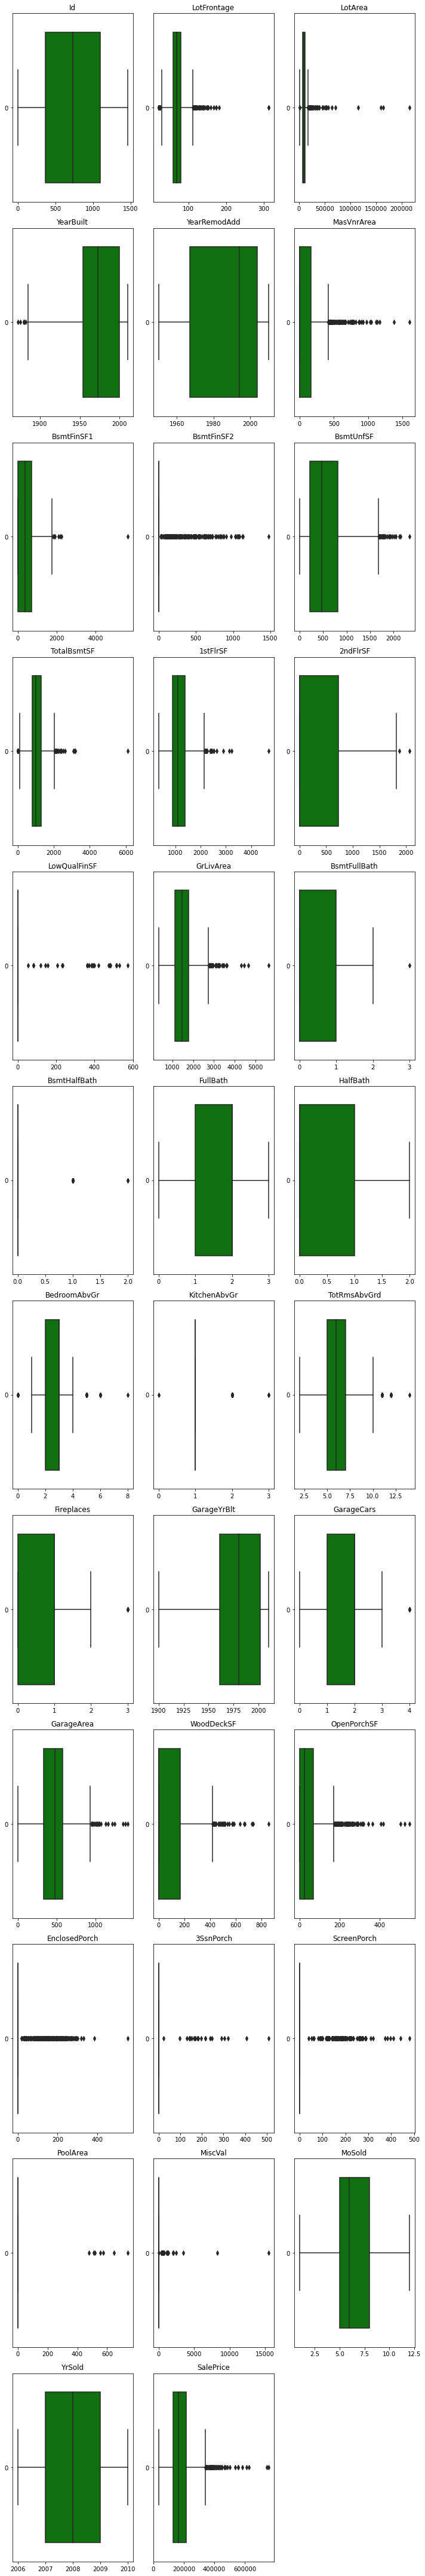

In [1149]:

n_cols = 3
n_rows = (len(eda_num.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 5*n_rows))

for i, ax in enumerate(axes.flatten()):
    if i < len(eda_num.columns):
        col = eda_num.columns[i]
        sns.boxplot(data=eda_num[col], color='green', orient="h", ax=ax)
        ax.set_title(col)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
  

In [1150]:
tanpa_label=df_train.drop(columns="SalePrice")

In [1151]:
corr_matrix = df_train.corr()

<AxesSubplot:>

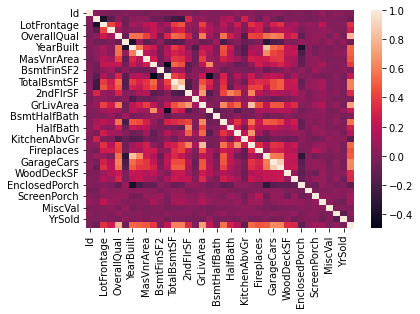

In [1152]:
sns.heatmap(corr_matrix)

In [1153]:
threshold = 0.5

<AxesSubplot:>

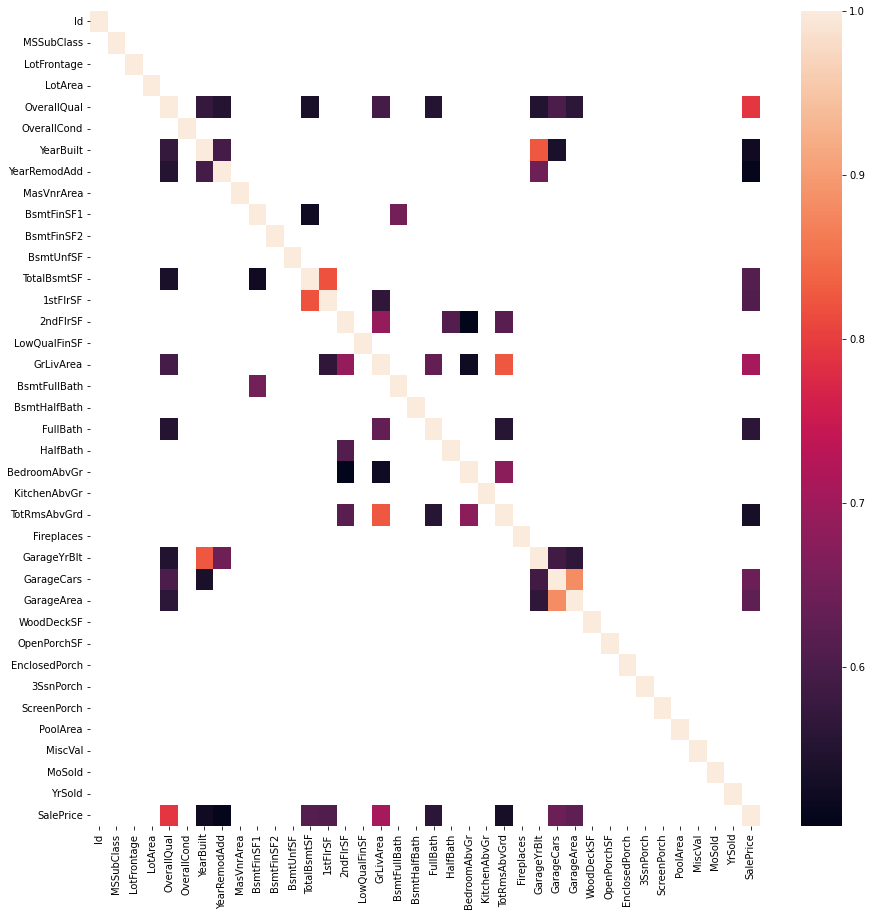

In [1154]:
plt.figure(figsize=(15,15))
corr_matrix[corr_matrix < threshold] = np.nan
sns.heatmap(corr_matrix)

In [1155]:
# Tipe Rumah 1 lantai, 2lantai (House Style)
# Kebanyakan pada 1story style dengan harga rata" 175985.477961
df_train.groupby("HouseStyle").agg({"HouseStyle":"count","SalePrice":"mean"})




,HouseStyle,SalePrice
HouseStyle,,
1.5Fin,154,143116.740260
1.5Unf,14,110150.000000
1Story,726,175985.477961
2.5Fin,8,220000.000000
2.5Unf,11,157354.545455
2Story,445,210051.764045
SFoyer,37,135074.486486
SLvl,65,166703.384615


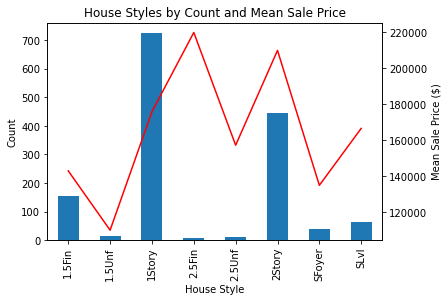

In [1156]:
grouped_data = df_train.groupby('HouseStyle').agg({'HouseStyle': 'count', 'SalePrice': 'mean'})

# Create a bar chart
grouped_data.plot(kind='bar', y='HouseStyle', legend=False)
plt.xlabel('House Style')
plt.ylabel('Count')
plt.twinx()
grouped_data.plot(kind='line', y='SalePrice', ax=plt.gca(), legend=False, color='r')
plt.ylabel('Mean Sale Price ($)')
plt.title('House Styles by Count and Mean Sale Price')
plt.show()

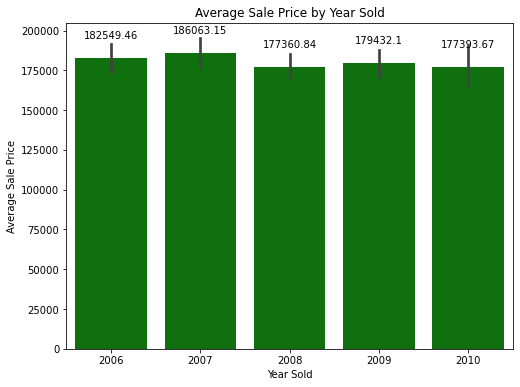

In [1157]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df_train["YrSold"], y=df_train["SalePrice"], estimator=np.mean, color='green')
plt.title("Average Sale Price by Year Sold")
plt.xlabel("Year Sold")
plt.ylabel("Average Sale Price")

# Annotate the bar plot with the actual values
for i, v in enumerate(df_train.groupby(["YrSold"])[['SalePrice']].agg('mean')['SalePrice']):
    ax.text(i, v+0.06*ax.get_ylim()[1], str(round(v,2)), ha="center")

plt.show()

In [1158]:
df_train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

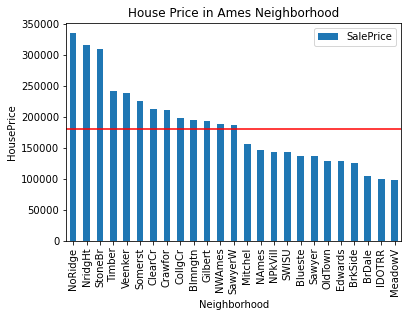

In [1159]:
#Harga rata-rata setiap rumah, diurutkan dari terbesar -> terkecil.
neighborhood_avg_price = df_train.groupby(["Neighborhood"])[["SalePrice"]].mean().sort_values(by='SalePrice',ascending=False)
neighborhood_avg_price.plot.bar(ylabel = 'HousePrice')
plt.axhline(y=df_train.SalePrice.mean(), color='red')
plt.title("House Price in Ames Neighborhood")
plt.show()


In [1160]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1161]:
df_train['MoSold'] = df_train['MoSold'].astype(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)

df_train['TimeSold'] = df_train['YrSold'] + df_train['MoSold']
df_train['TimeSold'] = pd.to_datetime(df_train['TimeSold'].astype(str), format='%Y%m').dt.to_period('M')
df_train['TimeSold'] = df_train['TimeSold'].astype(str)

In [1162]:
df_time = df_train[['TimeSold', 'SalePrice', 'YrSold', 'MoSold']].copy()

In [1163]:
df_time = df_time.groupby(['TimeSold'])[['SalePrice']].mean()
print(df_time)

              SalePrice
TimeSold               
2006-01   201090.000000
2006-02   194322.222222
2006-03   184982.200000
2006-04   174312.814815
2006-05   158928.289474
2006-06   172283.333333
2006-07   183211.059701
2006-08   196239.956522
2006-09   223768.866667
2006-10   172356.708333
2006-11   213285.000000
2006-12   185545.000000
2007-01   183234.615385
2007-02   176301.750000
2007-03   176567.782609
2007-04   170772.608696
2007-05   169873.511628
2007-06   179725.813559
2007-07   195396.843137
2007-08   183941.075000
2007-09   195533.818182
2007-10   215428.812500
2007-11   197709.333333
2007-12   214414.500000
2008-01   178504.692308
2008-02   159370.000000
2008-03   178505.277778
2008-04   159293.346154
2008-05   188334.473684
2008-06   169730.941176
2008-07   174562.653061
2008-08   196076.965517
2008-09   169626.470588
2008-10   166690.636364
2008-11   210981.058824
2008-12   175600.000000
2009-01   189735.500000
2009-02   187450.000000
2009-03   171547.368421
2009-04   181680

In [1164]:
df_time.reset_index(inplace=True)


In [1165]:
type(df_time['TimeSold'][0])

str

In [1166]:
df_time['12month_movin_average'] = df_time.SalePrice.rolling(12, min_periods=1).mean()
df_time['6month_movin_average'] = df_time.SalePrice.rolling(6, min_periods=1).mean()

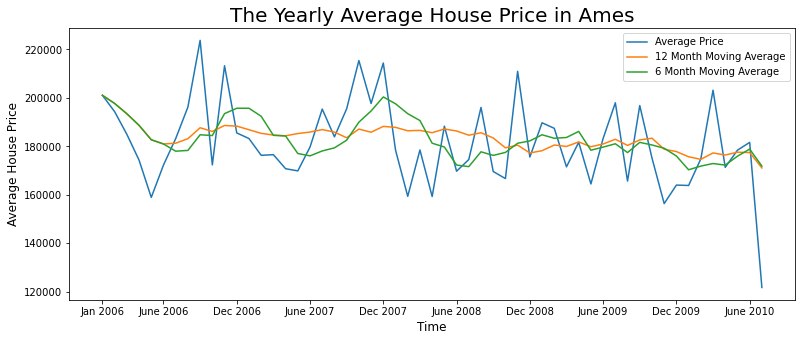

In [1167]:
pos = [
    '2006-01', '2006-06', '2006-12', 
    '2007-06', '2007-12', 
    '2008-06', '2008-12', 
    '2009-06', '2009-12', 
    '2010-06'
]

label = [
    'Jan 2006', 'June 2006', 'Dec 2006', 
    'June 2007', 'Dec 2007',
    'June 2008', 'Dec 2008',
    'June 2009', 'Dec 2009',
    'June 2010',
]

#harus diubah ke str dlu karena lineplot ga terima period/datetime 
plt.figure( figsize = (13, 5))
sns.lineplot(x=df_time['TimeSold'].astype(str), y='SalePrice', data=df_time, label='Average Price')
sns.lineplot(x=df_time['TimeSold'].astype(str), y=df_time['12month_movin_average'], data=df_time, label='12 Month Moving Average')
sns.lineplot(x=df_time['TimeSold'].astype(str), y=df_time['6month_movin_average'], data=df_time, label='6 Month Moving Average')
plt.title('The Yearly Average House Price in Ames', fontsize=20)
plt.ylabel('Average House Price', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.xticks(pos, label)
plt.show()

# Feature Engineering

Creating New Features called HouseAge

In [1168]:
df_train['YrSold'] = df_train['YrSold'].astype(int)

In [1169]:
df_train['HouseAge'] = df_train['YrSold'] - df_train['YearBuilt']

In [1170]:
df_train[['HouseAge', 'YrSold', 'YearBuilt']]

,HouseAge,YrSold,YearBuilt
0,5,2008,2003
1,31,2007,1976
2,7,2008,2001
3,91,2006,1915
4,8,2008,2000
...,...,...,...
1455,8,2007,1999
1456,32,2010,1978
1457,69,2010,1941
1458,60,2010,1950


In [1171]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1172]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Data Preprocessing
1. Fill Missing Values
2. Remove Duplicate
3. Resolve Incositencies
4. Remove Outliers
5. Remove Unecessary 
6. Feature Encoding
7. Feature Selection
8. Feature Scaling

# Spliting Features and Target Variable

In [1173]:
#Memindahkan Target Variable ke column paling terakhir
column_to_move = df_train.pop("SalePrice")
df_train.insert(82, 'SalePrice', column_to_move)

In [1174]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1175]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

## 1. Removing Redundant Variables 

In [1176]:
#Remove Id 
X=X.drop(columns=['Id'])

In [1177]:
#Remove MoSold and YrSold because we already created new features called TimeSold
X=X.drop(columns=['MoSold', 'YrSold'])

In [1178]:
# Semua feature ini ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr'] jika dijumlahkan hasilnya sama dengan TotRmsAbvGrd
# So we decide to remove ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr']
X.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',"TimeSold"], axis=1, inplace=True)

In [1179]:
#From the comparison we know that most of the GarageCond and GarageQuals is the same, for example if the Garage Conditionnya is Excellent then GarageQualnya is Excellent too.
#So we decide to choose only one which is GarageQual.
comparison = X['GarageCond'] == X['GarageQual']
comparison.value_counts()

True     1320
False     140
dtype: int64

In [1180]:
X.drop(['GarageCond'], axis=1, inplace=True)

In [1181]:
X.shape

(1460, 71)

In [1182]:
# X.drop(X.loc[X['Utilities'].isin(["NoSeWa"])].index, inplace=True)
# X.drop(X.loc[X['Condition2'].isin(["PosA","RRAn",'RRAe'])].index, inplace=True)
# X.drop(X.loc[X['HouseStyle'].isin(["2.5Fin"])].index, inplace=True)
# X.drop(X.loc[X['RoofMatl'].isin(["Metal","Membran","Roll",'ClyTile'])].index, inplace=True)
# X.drop(X.loc[X['Exterior1st'].isin(["ImStucc"])].index, inplace=True)
# X.drop(X.loc[X['Heating'].isin(["OthW","Floor"])].index, inplace=True)
# X.drop(X.loc[X['Electrical'].isin(["Mix"])].index, inplace=True)

## Check Missing Value

  ### Before

In [1183]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [1184]:
for col in X.columns:
  missing_values = X[col].isna().sum()
  print(f"{col} missing values: {missing_values}")

MSSubClass missing values: 0
MSZoning missing values: 0
LotFrontage missing values: 259
LotArea missing values: 0
Street missing values: 0
Alley missing values: 1369
LotShape missing values: 0
LandContour missing values: 0
Utilities missing values: 0
LotConfig missing values: 0
LandSlope missing values: 0
Neighborhood missing values: 0
Condition1 missing values: 0
Condition2 missing values: 0
BldgType missing values: 0
HouseStyle missing values: 0
OverallQual missing values: 0
OverallCond missing values: 0
YearBuilt missing values: 0
YearRemodAdd missing values: 0
RoofStyle missing values: 0
RoofMatl missing values: 0
Exterior1st missing values: 0
Exterior2nd missing values: 0
MasVnrType missing values: 8
MasVnrArea missing values: 8
ExterQual missing values: 0
ExterCond missing values: 0
Foundation missing values: 0
BsmtQual missing values: 37
BsmtCond missing values: 37
BsmtExposure missing values: 38
BsmtFinType1 missing values: 37
BsmtFinSF1 missing values: 0
BsmtFinType2 missing v

In [1185]:
#Drop missing values that are above 80% from all data
X.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [1186]:
X.shape

(1460, 67)

In [1187]:
values = {'BsmtQual':'No Basement', 
           'BsmtCond':'No Basement', 
            'BsmtExposure': 'No Basement',
           'BsmtFinType1': 'No Basement',
           'BsmtFinType2': 'No Basement',
           'FireplaceQu': 'No Fireplace',
           'GarageType': 'No Garage',
           'GarageFinish': 'No Garage',
          'GarageQual': 'No Garage',
          'GarageCond':'No Garage'
          }
X.fillna(value=values, inplace=True)

In [1188]:
X["MasVnrArea"]=X["MasVnrArea"].fillna(df_train["MasVnrArea"].mean(), axis=0)
X["LotFrontage"]=X["LotFrontage"].fillna(df_train["LotFrontage"].mean(), axis=0)
X["GarageYrBlt"]=X["GarageYrBlt"].fillna(1980, axis=0)
X["Electrical"]=X["Electrical"].fillna('SBrkr', axis=0)
X["MasVnrType"]=X["MasVnrType"].fillna('None', axis=0)

### After

In [1189]:
for col in X.columns:
  missing_values = X[col].isna().sum()
  print(f"{col} missing values: {missing_values}")

MSSubClass missing values: 0
MSZoning missing values: 0
LotFrontage missing values: 0
LotArea missing values: 0
Street missing values: 0
LotShape missing values: 0
LandContour missing values: 0
Utilities missing values: 0
LotConfig missing values: 0
LandSlope missing values: 0
Neighborhood missing values: 0
Condition1 missing values: 0
Condition2 missing values: 0
BldgType missing values: 0
HouseStyle missing values: 0
OverallQual missing values: 0
OverallCond missing values: 0
YearBuilt missing values: 0
YearRemodAdd missing values: 0
RoofStyle missing values: 0
RoofMatl missing values: 0
Exterior1st missing values: 0
Exterior2nd missing values: 0
MasVnrType missing values: 0
MasVnrArea missing values: 0
ExterQual missing values: 0
ExterCond missing values: 0
Foundation missing values: 0
BsmtQual missing values: 0
BsmtCond missing values: 0
BsmtExposure missing values: 0
BsmtFinType1 missing values: 0
BsmtFinSF1 missing values: 0
BsmtFinType2 missing values: 0
BsmtFinSF2 missing value

## Spliting Data Into Numerical dan Categorical 

In [1190]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical=["object"]

data_num = X.select_dtypes(include=numerics)
data_cat = X.select_dtypes(include=categorical) 

In [1191]:
data_num[['MSSubClass', 'OverallQual', 'OverallCond']]

,MSSubClass,OverallQual,OverallCond
0,60,7,5
1,20,6,8
2,60,7,5
3,70,7,5
4,60,8,5
...,...,...,...
1455,60,6,5
1456,20,6,6
1457,70,7,9
1458,20,5,6


In [1192]:
#Moving MSSubClass, OverAllQual, and OverallCond because it is categorical data 
data_cat['MSSubClass'] = data_num['MSSubClass']
data_cat['OverallQual'] = data_num['OverallQual']
data_cat['OverallCond'] = data_num['OverallCond']

data_num.drop(['MSSubClass', 'OverallQual', 'OverallCond'], axis=1, inplace=True)

In [1193]:
data_cat.shape

(1460, 41)

In [1194]:
data_num.shape

(1460, 26)

In [1195]:
# data_num.drop(['MoSold', 'TimeSold', 'YrSold'], axis=1, inplace=True)

In [1196]:
data_time = df_train[['TimeSold', 'YrSold', 'MoSold']].copy()

In [1197]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  TotRmsAbvGrd   1460 non-null   int64  
 14  Fireplaces     1460 non-null   int64  
 15  GarageYrBlt    1460 non-null   float64
 16  GarageCars     1460 non-null   int64  
 17  GarageArea     1460 non-null   int64  
 18  WoodDeck

In [1198]:
def outliers(df, feature):
  '''
  Takes a dataframe, and feature. This function will return the lower_bound and the upper_bound
  '''
  q1= df[feature].quantile (0.25)
  q3= df[feature].quantile (0.75)
  iqr= q3-q1

  lower_bound= q1- 1.5*iqr
  upper_bound= q3 + 1.5*iqr

  return lower_bound, upper_bound

In [1199]:
#Pandas any() method is applicable both on Series and Dataframe. It checks whether any value in the caller object (Dataframe or series) is not 0 and returns True for that. If all values are 0, it will return False.
def check_outlier(df, feature):
    '''
    Takes a dataframe, and feature. This function will return True if there's an outliers in the features and will return false if there is no outliers.
    '''
    lower_bound, upper_bound = outliers(df, feature)
    if df[(df[feature] > upper_bound) | (df[feature] < lower_bound)].any(axis=None):
        return True
    else:
        return False
for col in data_num:
    print(col, check_outlier(data_num, col))

LotFrontage True
LotArea True
YearBuilt True
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF True
TotalBsmtSF True
1stFlrSF True
2ndFlrSF True
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd True
Fireplaces True
GarageYrBlt True
GarageCars True
GarageArea True
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
PoolArea True
MiscVal True
HouseAge True


In [1200]:
def replace_outliers(df, feature):
  '''
  Takes a dataframe, and feature. This function will replace data that is lower and higher than the boundaries and replace it with the lower_bound and upper_bound values.
  '''
  lower_bound, upper_bound = outliers(df, feature)
  df.loc[(df[feature] < lower_bound), feature] = lower_bound
  df.loc[(df[feature] > upper_bound), feature] = upper_bound
  

In [1201]:
for col in data_num.columns:
    replace_outliers(data_num, col)

In [1202]:
for col in data_num:
    print(col, check_outlier(data_num, col))

LotFrontage False
LotArea False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
TotRmsAbvGrd False
Fireplaces False
GarageYrBlt False
GarageCars False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
PoolArea False
MiscVal False
HouseAge False


## Data Kategori Ordinal(Label Encoder)

In [1203]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lisa= data_cat[['OverallQual',"ExterQual","OverallCond","ExterCond","BsmtQual","BsmtCond","HeatingQC","KitchenQual","FireplaceQu","GarageQual", 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
       'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'SaleType', 'SaleCondition', 'MSSubClass']]
for i in lisa:
    data_cat[i]=le.fit_transform(lisa[i])

In [1204]:
data_cat.shape

(1460, 41)

## Data Kategori Nominal(One Hot Encoder)

#### Menghapus value counts



In [1205]:
# nominal_data=data_cat[[]]


# for i in nominal_data:
#        dummies=pd.get_dummies(data_cat[i],prefix=i)
#        data_cat= pd.concat([data_cat,dummies],axis=1)

In [1206]:
# data_cat.drop(data_cat[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
#        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
#        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
#        'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
#        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
#        'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
#        'SaleType', 'SaleCondition', 'MSSubClass']],axis=1,inplace=True)

In [1207]:
data_cat.shape

(1460, 41)

In [1208]:
X= pd.concat([data_cat, data_num], axis=1)

In [1209]:
X.shape

(1460, 67)

In [1210]:
X = X.iloc[:, :].values

In [1211]:
y = df_train.iloc[:, -1].values

In [1212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling

In [1213]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_train[:, 40:] =  scaler.fit_transform(X_train[:, 40:])

In [1214]:
X_test[:, 40:] = scaler.transform(X_test[:, 40:])

In [1215]:
# target_scaler = MinMaxScaler()
# y_train = target_scaler.fit_transform(y_train.reshape(-1, 1))
# y_test = target_scaler.transform(y_test.reshape(-1, 1))


In [1216]:
# target_scaler.inverse_transform(test_pred.reshape(-1,1))


# Modeling ✈

In [1217]:
def eval_regression(ytest,ytrain,test_pred,train_pred):
    print("MAE_Test: %.3f" % mean_absolute_error(ytest, test_pred)) 
    print("RMSE_Test: %.3f" % mean_squared_error(ytest, test_pred, squared=False)) 
    print('R2 score:_Test %.3f' % r2_score(ytest, test_pred))
    print("=================================================\n=================================================")
    print("MAE_Train: %.3f" % mean_absolute_error(ytrain, train_pred)) 
    print("RMSE_Train: %.3f" % mean_squared_error(ytrain, train_pred, squared=False)) 
    print('R2 score:_Train %.3f' % r2_score(ytrain, train_pred))
    
    
    
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [1218]:
LR=LinearRegression()
LR.fit(X_train, y_train)
test_pred=LR.predict(X_test)
train_pred=LR.predict(X_train)
eval_regression(y_test,y_train,test_pred,train_pred)
print("Train: %.4f" % LR.score(X_train,y_train),"Test: %.4f" % LR.score(X_test,y_test))

MAE_Test: 19852.858
RMSE_Test: 30443.551
R2 score:_Test 0.867
MAE_Train: 18214.127
RMSE_Train: 29415.965
R2 score:_Train 0.856
Train: 0.8562 Test: 0.8672


In [1219]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
test_pred=rf.predict(X_test)
train_pred=rf.predict(X_train)
eval_regression(y_test,y_train,test_pred,train_pred)
rf.score(X_train,y_train),rf.score(X_test,y_test)

MAE_Test: 16565.530
RMSE_Test: 25806.796
R2 score:_Test 0.905
MAE_Train: 6710.050
RMSE_Train: 11469.186
R2 score:_Train 0.978


(0.9781439580937833, 0.9045597921931857)

In [1271]:
## Tuning 
n_estimators=[150]
criterion=["poisson"]
max_depth=[20]
min_samples_leaf=[2]
max_features=["sqrt"]
bootstrap=[True,False]
min_samples_split=[16]
n_jobs=[-1,1]
oob_score=[False]






hyper=dict(max_depth=max_depth,bootstrap=bootstrap,n_jobs=n_jobs,criterion=criterion,min_samples_split=min_samples_split,
max_features=max_features,min_samples_leaf=min_samples_leaf,oob_score=oob_score,n_estimators=n_estimators)
rf=RandomForestRegressor(random_state=42)
asd=GridSearchCV(rf,hyper,cv=10,scoring='neg_root_mean_squared_error')

bestmodel=asd.fit(X_train,y_train)
test_pred=bestmodel.predict(X_test)
train_pred=bestmodel.predict(X_train)
eval_regression(y_test,y_train,test_pred,train_pred)
print("---------------------------------------------\n--------------")
show_best_hyperparameter(bestmodel.best_estimator_, hyper)
print("Train: %.4f" % bestmodel.score(X_train,y_train),"Test: %.4f" % bestmodel.score(X_test,y_test))

MAE_Test: 16808.467
RMSE_Test: 28621.117
R2 score:_Test 0.883
MAE_Train: 9820.122
RMSE_Train: 17815.191
R2 score:_Train 0.947
---------------------------------------------
--------------
Best max_depth: 20
Best bootstrap: False
Best n_jobs: -1
Best criterion: poisson
Best min_samples_split: 16
Best max_features: sqrt
Best min_samples_leaf: 2
Best oob_score: False
Best n_estimators: 150
Train: -17815.1914 Test: -28621.1173


In [1221]:
# sdas = target_scaler.inverse_transform(test_pred.reshape(-1,1))
# sdas

# |-------------------------------------------------------------------------------

In [1222]:
# Xgboost
modelxg = XGBRegressor(max_depth=2,n_estimators=200,random_state=42)
modelxg.fit(X_train, y_train)
test_pred__xg=modelxg.predict(X_test)
train_pred=modelxg.predict(X_train)
eval_regression(y_test,y_train,test_pred__xg,train_pred)
modelxg.score(X_train,y_train),modelxg.score(X_test,y_test)

MAE_Test: 16234.563
RMSE_Test: 24961.669
R2 score:_Test 0.911
MAE_Train: 7989.910
RMSE_Train: 10862.121
R2 score:_Train 0.980


(0.9803964124302406, 0.9107084355926331)

In [1223]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(algorithm='auto')
kn.fit(X_train, y_train)
test_las=kn.predict(X_test)
train_las=kn.predict(X_train)
eval_regression(y_test,y_train,test_las,train_las)

MAE_Test: 28851.781
RMSE_Test: 44620.497
R2 score:_Test 0.715
MAE_Train: 24446.990
RMSE_Train: 37951.891
R2 score:_Train 0.761


# DATA TEST ✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅

In [1224]:
df_test = pd.read_csv('https://raw.githubusercontent.com/MikhaelAmos/House-Prices-Project/main/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1225]:
id_aja=df_test['Id'].copy()

# Feature Engineering

Creating New Features called HouseAge

In [1226]:
df_test['YearBuilt']

0       1961
1       1958
2       1997
3       1998
4       1992
        ... 
1454    1970
1455    1970
1456    1960
1457    1992
1458    1993
Name: YearBuilt, Length: 1459, dtype: int64

In [1227]:
df_test['MoSold'] = df_test['MoSold'].astype(str)
df_test['YrSold'] = df_test['YrSold'].astype(str)

df_test['TimeSold'] = df_test['YrSold'] + df_test['MoSold']
df_test['TimeSold'] = pd.to_datetime(df_test['TimeSold'].astype(str), format='%Y%m').dt.to_period('M')
df_test['TimeSold'] = df_test['TimeSold'].astype(str)

In [1228]:
df_test['YrSold'] = df_test['YrSold'].astype(int)

In [1229]:
df_test['HouseAge'] = df_test['YrSold'] - df_test['YearBuilt']

In [1230]:
df_test["YearBuilt"]

0       1961
1       1958
2       1997
3       1998
4       1992
        ... 
1454    1970
1455    1970
1456    1960
1457    1992
1458    1993
Name: YearBuilt, Length: 1459, dtype: int64

In [1231]:
df_test[['HouseAge', 'YrSold', 'YearBuilt']]

,HouseAge,YrSold,YearBuilt
0,49,2010,1961
1,52,2010,1958
2,13,2010,1997
3,12,2010,1998
4,18,2010,1992
...,...,...,...
1454,36,2006,1970
1455,36,2006,1970
1456,46,2006,1960
1457,14,2006,1992


# Data Preprocessing
1. Fill Missing Values
2. Remove Duplicate
3. Resolve Incositencies
4. Remove Outliers
5. Remove Unecessary 
6. Feature Encoding
7. Feature Selection
8. Feature Scaling

## 1. Removing Redundant Variables 

In [1232]:
#Remove Id 
df_test=df_test.drop(columns=['Id'])

In [1233]:
#Remove MoSold and YrSold because we already created new features called TimeSold
df_test=df_test.drop(columns=['MoSold', 'YrSold'])

In [1234]:
# Semua feature ini ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr'] jika dijumlahkan hasilnya sama dengan TotRmsAbvGrd
# So we decide to remove ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr']
df_test.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',"TimeSold"], axis=1, inplace=True)

In [1235]:
#From the comparison we know that most of the GarageCond and GarageQuals is the same, for example if the Garage Conditionnya is Excellent then GarageQualnya is Excellent too.
#So we decide to choose only one which is GarageQual.
comparison = df_test['GarageCond'] == df_test['GarageQual']
comparison.value_counts()

True     1290
False     169
dtype: int64

In [1236]:
df_test.drop(['GarageCond'], axis=1, inplace=True)

In [1237]:
df_test.shape

(1459, 71)


# Check Missing Value

  ### Before

In [1238]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [1239]:
for col in df_test.columns:
  missing_values = df_test[col].isna().sum()
  print(f"{col} missing values: {missing_values}")

MSSubClass missing values: 0
MSZoning missing values: 4
LotFrontage missing values: 227
LotArea missing values: 0
Street missing values: 0
Alley missing values: 1352
LotShape missing values: 0
LandContour missing values: 0
Utilities missing values: 2
LotConfig missing values: 0
LandSlope missing values: 0
Neighborhood missing values: 0
Condition1 missing values: 0
Condition2 missing values: 0
BldgType missing values: 0
HouseStyle missing values: 0
OverallQual missing values: 0
OverallCond missing values: 0
YearBuilt missing values: 0
YearRemodAdd missing values: 0
RoofStyle missing values: 0
RoofMatl missing values: 0
Exterior1st missing values: 1
Exterior2nd missing values: 1
MasVnrType missing values: 16
MasVnrArea missing values: 15
ExterQual missing values: 0
ExterCond missing values: 0
Foundation missing values: 0
BsmtQual missing values: 44
BsmtCond missing values: 45
BsmtExposure missing values: 44
BsmtFinType1 missing values: 42
BsmtFinSF1 missing values: 1
BsmtFinType2 missing

In [1240]:
#Drop missing values that are above 80% from all data
df_test.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [1241]:
df_test.shape

(1459, 67)

In [1242]:
values = {'BsmtQual':'No Basement', 
           'BsmtCond':'No Basement', 
            'BsmtExposure': 'No Basement',
           'BsmtFinType1': 'No Basement',
           'BsmtFinType2': 'No Basement',
           'FireplaceQu': 'No Fireplace',
           'GarageType': 'No Garage',
           'GarageFinish': 'No Garage',
          'GarageQual': 'No Garage',
          'GarageCond':'No Garage'
          }
df_test.fillna(value=values, inplace=True)

In [1243]:
df_test["MasVnrArea"]=df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].mean(), axis=0)
df_test["LotFrontage"]=df_test["LotFrontage"].fillna(df_test["LotFrontage"].mean(), axis=0)
df_test["GarageYrBlt"]=df_test["GarageYrBlt"].fillna(1980, axis=0)
df_test["Electrical"]=df_test["Electrical"].fillna('SBrkr', axis=0)
df_test["MasVnrType"]=df_test["MasVnrType"].fillna('None', axis=0)
df_test["MSZoning"]=df_test["MSZoning"].fillna('RL', axis=0)
df_test["Utilities"]=df_test["Utilities"].fillna('AllPub', axis=0)
df_test["Exterior1st"]=df_test["Exterior1st"].fillna('VinylSd', axis=0)
df_test["Exterior2nd"]=df_test["Exterior2nd"].fillna('VinylSd', axis=0)
df_test["BsmtFinSF1"]=df_test["BsmtFinSF1"].fillna(df_test["BsmtFinSF1"].mean(), axis=0)
df_test["BsmtFinSF2"]=df_test["BsmtFinSF2"].fillna(df_test["BsmtFinSF2"].mean(), axis=0)
df_test["BsmtUnfSF"]=df_test["BsmtUnfSF"].fillna(df_test["BsmtUnfSF"].mean(), axis=0)
df_test["KitchenQual"]=df_test["KitchenQual"].fillna('TA', axis=0)
df_test["Functional"]=df_test["Functional"].fillna('Typ', axis=0)
df_test["GarageCars"]=df_test["GarageCars"].fillna(df_test["GarageCars"].mean(), axis=0)
df_test["SaleType"]=df_test["SaleType"].fillna('WD', axis=0)
df_test["GarageArea"]=df_test["GarageArea"].fillna(df_test["GarageArea"].mean(), axis=0)
df_test["TotalBsmtSF"]=df_test["TotalBsmtSF"].fillna(df_test["TotalBsmtSF"].mean(), axis=0)

In [1244]:
df_test["TotalBsmtSF"].mode()

0    0.0
dtype: float64

### After

In [1245]:
for col in df_test.columns:
  missing_values = df_test[col].isna().sum()
  print(f"{col} missing values: {missing_values}")

MSSubClass missing values: 0
MSZoning missing values: 0
LotFrontage missing values: 0
LotArea missing values: 0
Street missing values: 0
LotShape missing values: 0
LandContour missing values: 0
Utilities missing values: 0
LotConfig missing values: 0
LandSlope missing values: 0
Neighborhood missing values: 0
Condition1 missing values: 0
Condition2 missing values: 0
BldgType missing values: 0
HouseStyle missing values: 0
OverallQual missing values: 0
OverallCond missing values: 0
YearBuilt missing values: 0
YearRemodAdd missing values: 0
RoofStyle missing values: 0
RoofMatl missing values: 0
Exterior1st missing values: 0
Exterior2nd missing values: 0
MasVnrType missing values: 0
MasVnrArea missing values: 0
ExterQual missing values: 0
ExterCond missing values: 0
Foundation missing values: 0
BsmtQual missing values: 0
BsmtCond missing values: 0
BsmtExposure missing values: 0
BsmtFinType1 missing values: 0
BsmtFinSF1 missing values: 0
BsmtFinType2 missing values: 0
BsmtFinSF2 missing value

## Spliting Data Into Numerical dan Categorical 

In [1246]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical=["object"]

data_num_test = df_test.select_dtypes(include=numerics)
data_cat_test = df_test.select_dtypes(include=categorical) 

In [1247]:
data_num_test[['MSSubClass', 'OverallQual', 'OverallCond']]

,MSSubClass,OverallQual,OverallCond
0,20,5,6
1,20,6,6
2,60,5,5
3,60,6,6
4,120,8,5
...,...,...,...
1454,160,4,7
1455,160,4,5
1456,20,5,7
1457,85,5,5


In [1248]:
#Moving MSSubClass, OverAllQual, and OverallCond because it is categorical data 
data_cat_test['MSSubClass'] = data_num_test['MSSubClass']
data_cat_test['OverallQual'] = data_num_test['OverallQual']
data_cat_test['OverallCond'] = data_num_test['OverallCond']

data_num_test.drop(['MSSubClass', 'OverallQual', 'OverallCond'], axis=1, inplace=True)

In [1249]:
# data_num.drop(['MoSold', 'TimeSold', 'YrSold'], axis=1, inplace=True)

In [1250]:
def outliers(df, feature):
  '''
  Takes a dataframe, and feature. This function will return the lower_bound and the upper_bound
  '''
  q1= df[feature].quantile (0.25)
  q3= df[feature].quantile (0.75)
  iqr= q3-q1

  lower_bound= q1- 1.5*iqr
  upper_bound= q3 + 1.5*iqr

  return lower_bound, upper_bound

In [1251]:
#Pandas any() method is applicable both on Series and Dataframe. It checks whether any value in the caller object (Dataframe or series) is not 0 and returns True for that. If all values are 0, it will return False.
def check_outlier(df, feature):
    '''
    Takes a dataframe, and feature. This function will return True if there's an outliers in the features and will return false if there is no outliers.
    '''
    lower_bound, upper_bound = outliers(df, feature)
    if df[(df[feature] > upper_bound) | (df[feature] < lower_bound)].any(axis=None):
        return True
    else:
        return False
for col in data_num_test:
    print(col, check_outlier(data_num_test, col))

LotFrontage True
LotArea True
YearBuilt True
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF True
TotalBsmtSF True
1stFlrSF True
2ndFlrSF True
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd True
Fireplaces True
GarageYrBlt True
GarageCars True
GarageArea True
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
PoolArea True
MiscVal True
HouseAge True


In [1252]:
def replace_outliers(df, feature):
  '''
  Takes a dataframe, and feature. This function will replace data that is lower and higher than the boundaries and replace it with the lower_bound and upper_bound values.
  '''
  lower_bound, upper_bound = outliers(df, feature)
  df.loc[(df[feature] < lower_bound), feature] = lower_bound
  df.loc[(df[feature] > upper_bound), feature] = upper_bound
  

In [1253]:
for col in data_num_test.columns:
    replace_outliers(data_num_test, col)

In [1254]:
for col in data_num_test:
    print(col, check_outlier(data_num_test, col))

LotFrontage False
LotArea False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
TotRmsAbvGrd False
Fireplaces False
GarageYrBlt False
GarageCars False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
PoolArea False
MiscVal False
HouseAge False


## Data Kategori Ordinal(Label Encoder)

In [1255]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lisa= data_cat_test[['OverallQual',"ExterQual","OverallCond","ExterCond","BsmtQual","BsmtCond","HeatingQC","KitchenQual","FireplaceQu","GarageQual",'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
       'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
       'SaleType', 'SaleCondition', 'MSSubClass']]
for i in lisa:
    data_cat_test[i]=le.fit_transform(lisa[i])

In [1256]:
data_cat_test.shape

(1459, 41)

## Data Kategori Nominal(One Hot Encoder)

In [1257]:
# nominal_data=data_cat_test[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
#        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
#        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
#        'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
#        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
#        'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
#        'SaleType', 'SaleCondition', 'MSSubClass']]


# for i in nominal_data:
#        dummies=pd.get_dummies(data_cat_test[i],prefix=i)
#        data_cat_test= pd.concat([data_cat_test,dummies],axis=1)

In [1258]:
# data_cat_test.drop(data_cat_test[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
#        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
#        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
#        'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
#        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
#        'Functional', 'GarageType', 'GarageFinish', 'PavedDrive',
#        'SaleType', 'SaleCondition', 'MSSubClass']],axis=1,inplace=True)

In [1259]:
data_cat_test.shape

(1459, 41)

In [1260]:
X_test_blind= pd.concat([data_cat_test, data_num_test], axis=1)


In [1261]:
X_test_blind.info

<bound method DataFrame.info of       MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
0            2       1         3            3          0          4   
1            3       1         0            3          0          0   
2            3       1         0            3          0          4   
3            3       1         0            3          0          4   
4            3       1         0            1          0          4   
...        ...     ...       ...          ...        ...        ...   
1454         4       1         3            3          0          4   
1455         4       1         3            3          0          4   
1456         3       1         3            3          0          4   
1457         3       1         3            3          0          4   
1458         3       1         3            3          0          4   

      LandSlope  Neighborhood  Condition1  Condition2  ...  GarageCars  \
0             0            12           1

In [1262]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_test_blind =  scaler.fit_transform(X_test_blind)
X_test_blind

array([[0.5      , 1.       , 1.       , ..., 0.       , 0.       ,
        0.390625 ],
       [0.75     , 1.       , 0.       , ..., 0.       , 0.       ,
        0.4140625],
       [0.75     , 1.       , 0.       , ..., 0.       , 0.       ,
        0.109375 ],
       ...,
       [0.75     , 1.       , 1.       , ..., 0.       , 0.       ,
        0.3671875],
       [0.75     , 1.       , 1.       , ..., 0.       , 0.       ,
        0.1171875],
       [0.75     , 1.       , 1.       , ..., 0.       , 0.       ,
        0.109375 ]])

In [1263]:
# print(X_test_blind.isnull().sum())

# Apply model ke data test

In [1264]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# random forest
blind_pred = rf.predict(X_test_blind)
test_pred=pd.DataFrame(blind_pred,columns=["SalePrice"])
test_pred=pd.concat([id_aja,test_pred],axis=1)
test_pred.to_csv('random_forest2.csv', index=False)

In [1265]:
test_pred

,Id,SalePrice
0,1461,104147.50
1,1462,153272.95
2,1463,200239.90
3,1464,180161.66
4,1465,161954.28
...,...,...
1454,2915,85472.50
1455,2916,91150.00
1456,2917,166147.90
1457,2918,104326.50


In [1266]:
# random_forest_tuning
tuning= bestmodel.predict(X_test_blind)
into_data_frame_random_forest=pd.DataFrame(tuning,columns=["SalePrice"])
tuning_random=pd.concat([id_aja,into_data_frame_random_forest],axis=1)

tuning_random.to_csv('tuning_random_forest2.csv', index=False)

In [1268]:
tuning_random

,Id,SalePrice
0,1461,134402.322001
1,1462,152834.734635
2,1463,204281.964079
3,1464,197049.410965
4,1465,180786.705951
...,...,...
1454,2915,118579.268305
1455,2916,118071.717544
1456,2917,184829.510144
1457,2918,155607.101465


In [1267]:

xg_boost_1=modelxg.predict(X_test_blind)

xg_boost_2=pd.DataFrame(xg_boost_1,columns=["SalePrice"])
xg_boost_3=pd.concat([id_aja,xg_boost_2],axis=1)
xg_boost_3.to_csv('xgboost_1.csv', index=False)